# Random Forest on “Cardiotography” dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('C:\\Users\\HP\\Desktop\\machine learning\\CASE STUDY\\CASE RANDOM FOREST\\CTG.csv')  # Replace with your dataset file path

# Explore the dataset
print(data.head())

    LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  ...  \
0  120  0.000000  0.0  0.000000  0.000000  0.0  0.0    73   0.5    43  ...   
1  132  0.006380  0.0  0.006380  0.003190  0.0  0.0    17   2.1     0  ...   
2  133  0.003322  0.0  0.008306  0.003322  0.0  0.0    16   2.1     0  ...   
3  134  0.002561  0.0  0.007682  0.002561  0.0  0.0    16   2.4     0  ...   
4  132  0.006515  0.0  0.008143  0.000000  0.0  0.0    16   2.4     0  ...   

   Min  Max  Nmax  Nzeros  Mode  Mean  Median  Variance  Tendency  NSP  
0   62  126     2       0   120   137     121        73         1    2  
1   68  198     6       1   141   136     140        12         0    1  
2   68  198     5       1   141   135     138        13         0    1  
3   53  170    11       0   137   134     137        13         1    1  
4   53  170     9       0   137   136     138        11         1    1  

[5 rows x 22 columns]


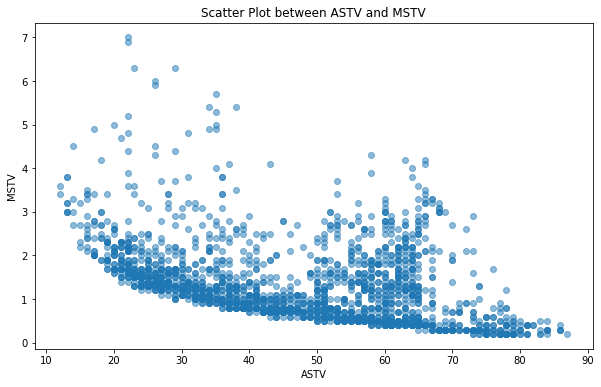

In [2]:
plt.figure(figsize=(10, 6))
plt.scatter(data['ASTV'], data['MSTV'], alpha=0.5)
plt.xlabel('ASTV')
plt.ylabel('MSTV')
plt.title('Scatter Plot between ASTV and MSTV')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Independent variable (ASTV) and dependent variable (NSP)
X1 = data[['ASTV']]
y1 = data['NSP']

# Split the data into train and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

# Build and train the Random Forest classifier
clf1 = RandomForestClassifier(n_estimators=300, random_state=42)
clf1.fit(X1_train, y1_train)

# Predict values on the test set
y1_pred = clf1.predict(X1_test)

# Build a confusion matrix and calculate accuracy
conf_matrix1 = confusion_matrix(y1_test, y1_pred)
accuracy1 = accuracy_score(y1_test, y1_pred)

print("Confusion Matrix (Task 1):\n", conf_matrix1)
print("Accuracy (Task 1):", accuracy1)

Confusion Matrix (Task 1):
 [[470  20   6]
 [ 60  36   5]
 [ 26   9   6]]
Accuracy (Task 1): 0.8025078369905956


In [4]:
# Independent variables (LB, ASTV, MSTV, Variance) and dependent variable (NSP)
X2 = data[['LB', 'ASTV', 'MSTV', 'Variance']]
y2 = data['NSP']

# Split the data into train and test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

# Build and train the Random Forest classifier
clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
clf2.fit(X2_train, y2_train)

# Predict values on the test set
y2_pred = clf2.predict(X2_test)

# Build a confusion matrix and calculate accuracy
conf_matrix2 = confusion_matrix(y2_test, y2_pred)
accuracy2 = accuracy_score(y2_test, y2_pred)

print("Confusion Matrix (Task 2):\n", conf_matrix2)
print("Accuracy (Task 2):", accuracy2)

Confusion Matrix (Task 2):
 [[474  15   7]
 [ 26  63  12]
 [  5   5  31]]
Accuracy (Task 2): 0.890282131661442


Our multi random forest model has given us a accuracy of 89% which is higher than our first simple model that was 80%.
now we will apply all the other classifications algo and see if we get higher accuracy or not 

# now we will build all models using all independent attributes except NSP which is our dependent attribute.

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load your dataset (replace 'your_dataset.csv' with the actual dataset path)
data = pd.read_csv('C:\\Users\\HP\\Desktop\\machine learning\\CASE STUDY\\CASE RANDOM FOREST\\CTG.csv')  # Replace with your dataset file path

# Define independent (X) and dependent (y) variables
X = data.drop(columns=['NSP'])  # Adjust columns as needed
y = data['NSP']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a list of classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Classifier': SVC(),
    'Naive Bayes': GaussianNB()
}

# Train, test, and compare classifiers
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Find the classifier with the highest accuracy
best_classifier = max(results, key=results.get)
best_accuracy = results[best_classifier]

print("Classifier with Highest Accuracy:", best_classifier)
print("Accuracy:", best_accuracy)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier with Highest Accuracy: Random Forest
Accuracy: 0.9435736677115988


In [6]:
print(results)

{'Logistic Regression': 0.8495297805642633, 'Decision Tree': 0.9263322884012539, 'Random Forest': 0.9435736677115988, 'K-Nearest Neighbors': 0.8761755485893417, 'Support Vector Classifier': 0.85423197492163, 'Naive Bayes': 0.7962382445141066}


# So Random Forest will be the best fit for our data 